In [1]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
class OptimalRF():
    def __init__(self, X_train: np.ndarray, X_test: np.ndarray, y_train: pd.DataFrame, y_test: pd.DataFrame, nest: int, maxd: int) -> None:
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
        self.nest = nest
        self.maxd = maxd
    
    def find_best_rf(self):
        param_dist = {'n_estimators': randint(1, self.nest), 'max_depth': randint(1, self.maxd)}
        
        rf = RandomForestClassifier(class_weight="balanced")
        rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
        
        rand_search.fit(self.X_train, self.y_train['class'])
        
#         self.best_est = rand_search.best_estimator_
        self.best_params = rand_search.best_params_
        print('Best hyperparameters:', self.best_params)
    
    def train_best_rf(self):
        self.rf_best = RandomForestClassifier(max_depth=self.best_params['max_depth'], n_estimators=self.best_params['n_estimators'])
        self.rf_best.fit(self.X_train, self.y_train['class'])
    
    def make_prediction(self):
        self.y_pred = self.rf_best.predict(self.X_test)
    
    def calc_scores(self):
        self.accuracy = accuracy_score(self.y_test['class'], self.y_pred)
        self.precision = precision_score(self.y_test['class'], self.y_pred)
        self.recall = recall_score(self.y_test['class'], self.y_pred)
        self.f1 = 2*self.precision*self.recall/(self.precision + self.recall)
        
        print("Accuracy =", self.accuracy)
        print("Precision =", self.precision)
        print("Recall =", self.recall)
        print("F1 =", self.f1, '\n')
    
    def print_confusion_matrix(self):
        cm = confusion_matrix(self.y_test['class'], self.y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    
    def run(self):
        self.find_best_rf()
        self.train_best_rf()
        self.make_prediction()
        self.calc_scores()
        self.print_confusion_matrix()

In [29]:
front_dir = '../../data/intermediates/pca/cond1_pat1to81_outrmv_kfold-5'
fold = 0
X_train = np.loadtxt(front_dir + '/X_train-' + str(fold) + '_cond1_pat1to81_outrmv_kfold-5.csv', delimiter=',')
X_test = np.loadtxt(front_dir + '/X_test-' + str(fold) + '_cond1_pat1to81_outrmv_kfold-5.csv', delimiter=',')
y_train = pd.read_csv(front_dir + '/y_train-' + str(fold) + '_cond1_pat1to81_outrmv_kfold-5.csv', index_col=0)
y_test = pd.read_csv(front_dir + '/y_test-' + str(fold) + '_cond1_pat1to81_outrmv_kfold-5.csv', index_col=0)

print('---- X_train ----')
print(X_train, '\n')
print('---- X_test ----')
print(X_test, '\n')
print('---- y_train ----')
display(y_train)
print('---- y_test ----')
display(y_test)

---- X_train ----
[[-1.57638940e+01  2.00189560e+01 -6.95358171e+01 ... -1.32623587e+01
   9.34303380e+00  3.83353259e-14]
 [-7.24219805e+01 -2.75379812e+01  4.36732277e+01 ... -4.51712505e+00
  -2.62399810e+00  3.83353259e-14]
 [ 2.02864877e+00  4.29064393e+01  4.66901273e+01 ... -2.55224762e+00
  -5.97349695e-01  3.83353259e-14]
 ...
 [-8.50087990e+01  1.72893794e+00  2.10735883e+01 ... -4.61187956e+01
  -2.97140484e+01  3.83353259e-14]
 [-5.91521361e+01 -1.20241037e+01  6.35482531e+01 ... -2.84382362e+01
  -3.71892696e+01  3.83353259e-14]
 [-4.36510406e+01 -7.08231522e+00 -4.59169771e+00 ...  1.52659230e+01
   1.58467752e+00  3.83353259e-14]] 

---- X_test ----
[[-8.56185974e+01 -6.01348074e+00  4.99166881e+00  1.58584171e+01
   3.29125665e+00 -1.21084280e+01  1.49929317e+01 -7.03202444e+00
  -6.24186790e+00  5.55503151e+00 -2.61789277e+00 -1.95847170e+00
   6.07059776e+00 -1.69310587e+00 -5.19520442e+00 -4.93001770e+00
   9.43761586e-01  1.53400550e+01  3.21252646e+00  2.29357481e+

,subject,class
0,1,0
1,2,0
2,3,0
3,4,0
4,6,0
5,7,0
6,9,0
7,13,0
8,14,0
9,15,0


---- y_test ----


,subject,class
0,8,0
1,11,0
2,12,0
3,18,0
4,29,1
5,47,1
6,51,1
7,52,1
8,54,1
9,59,0


Best hyperparameters: {'max_depth': 4, 'n_estimators': 16}
Accuracy: 0.625
Precision: 0.625
Recall: 1.0
F1: 0.7692307692307693
CPU times: user 1.91 s, sys: 30.1 ms, total: 1.94 s
Wall time: 1.97 s


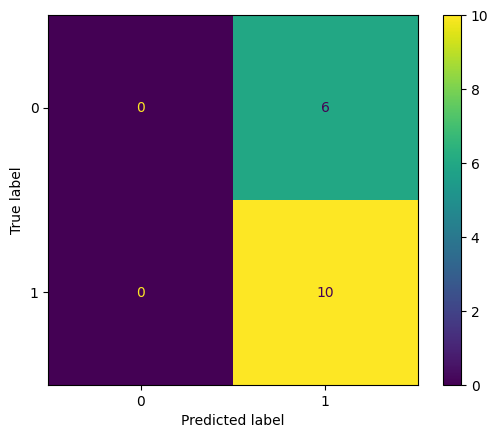

In [30]:
%%time
orf = OptimalRF(X_train, X_test, y_train, y_test, 100, 10)
orf.run()

Best hyperparameters: {'max_depth': 4, 'n_estimators': 102}
Accuracy = 0.625
Precision = 0.625
Recall = 1.0
F1 = 0.7692307692307693 

Best hyperparameters: {'max_depth': 9, 'n_estimators': 98}
Accuracy = 0.6
Precision = 0.6
Recall = 1.0
F1 = 0.7499999999999999 

Best hyperparameters: {'max_depth': 7, 'n_estimators': 135}
Accuracy = 0.6
Precision = 0.6
Recall = 1.0
F1 = 0.7499999999999999 

Best hyperparameters: {'max_depth': 9, 'n_estimators': 134}
Accuracy = 0.6
Precision = 0.6
Recall = 1.0
F1 = 0.7499999999999999 

Best hyperparameters: {'max_depth': 4, 'n_estimators': 189}
Accuracy = 0.6666666666666666
Precision = 0.6666666666666666
Recall = 1.0
F1 = 0.8 


---------------------------------------------------------------------

The average accuracy, precision, recall, and F1-score are as follows:
Accuracy = 0.6183333333333334
Precision = 0.6183333333333334
Recall = 1.0
F1 = 0.7638461538461538

---------------------------------------------------------------------

CPU times: user 26.5

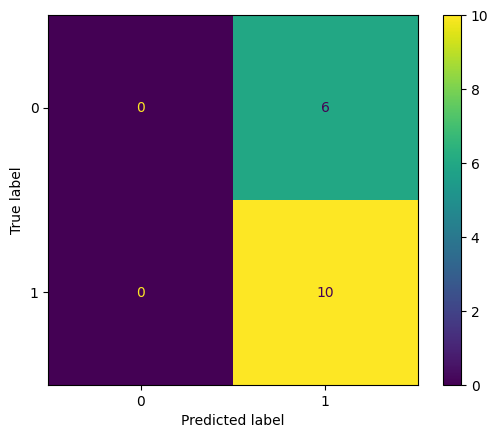

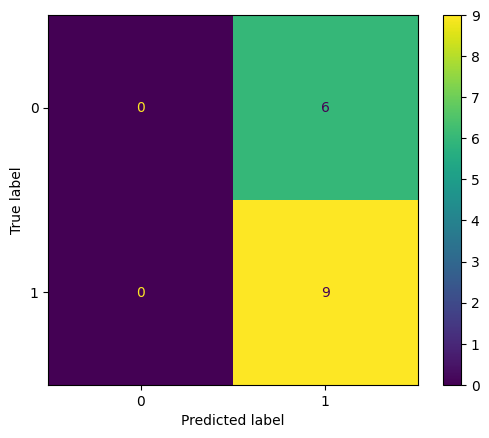

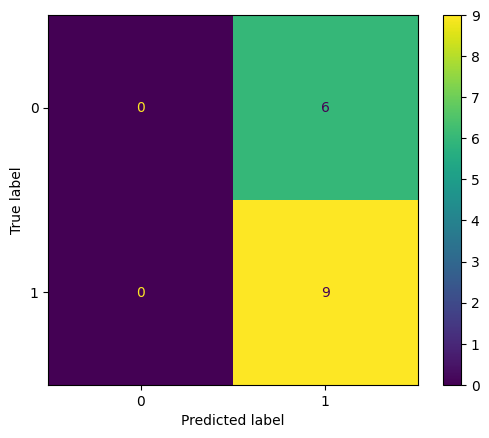

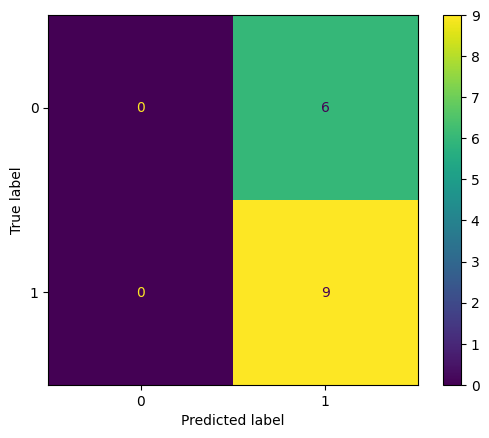

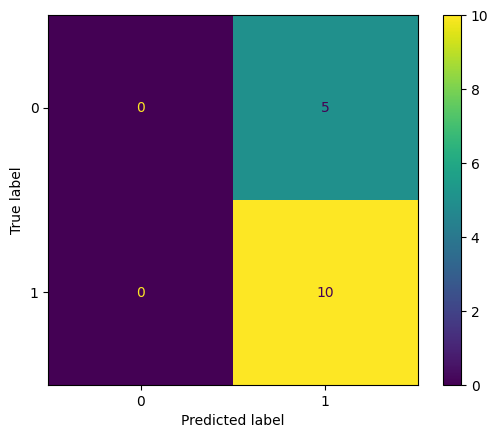

In [45]:
%%time

tot_folds = 5
data_handle = 'cond1_pat1to81_outrmv_kfold-5'
data_dir = '../../data/intermediates/pca/' + data_handle

n_est = 200
max_d = 10

avg_accuracy = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0

for ff in range(tot_folds):
    X_train = np.loadtxt(data_dir + '/X_train-' + str(ff) + '_' + data_handle + '.csv', delimiter=',')
    X_test = np.loadtxt(data_dir + '/X_test-' + str(ff) + '_' + data_handle + '.csv', delimiter=',')
    y_train = pd.read_csv(data_dir + '/y_train-' + str(ff) + '_' + data_handle + '.csv', index_col=0)
    y_test = pd.read_csv(data_dir + '/y_test-' + str(ff) + '_' + data_handle + '.csv', index_col=0)
    
    orf = OptimalRF(X_train, X_test, y_train, y_test, n_est, max_d)
    orf.run()
    
    avg_accuracy += orf.accuracy
    avg_precision += orf.precision
    avg_recall += orf.recall
    avg_f1 += orf.f1

print('\n---------------------------------------------------------------------\n')
print('The average accuracy, precision, recall, and F1-score are as follows:')
print("Accuracy =", avg_accuracy/tot_folds)
print("Precision =", avg_precision/tot_folds)
print("Recall =", avg_recall/tot_folds)
print("F1 =", avg_f1/tot_folds)
print('\n---------------------------------------------------------------------\n')

In [ ]:
# F- I-- N---